# Instructions

Today you're going to practice working in Pandas. 


You'll walk through instantiating a `DataFrame`, reading data into it, looking at and examining that data, and then playing with it. 



We'll be using the data in the `data` folder located within this directory (it's the same wine data that we looked at during lecture). 


Typically, we use IPython notebooks like this for a very specific set of things - presentations and EDA. 


Today, as we'll be playing around with `Pandas`, much of what we'll be doing is considered EDA. Therefore, by using a notebook, we'll get a tighter feedback loop with our work than we would trying to write a script. But, in general, **we do not use IPython notebooks for development**. 

Below, we've put a set of questions and then a cell for you to work on answers. However, feel free to add additional cells if you'd like. Often it will make sense to use more than one cell for your answers. 

# Assignment Questions 

### Part 1 - The Basics of DataFrames

Let's start off by following the general workflow that we use when moving data into a DataFrame: 

    * Importing Pandas
    * Reading data into the DataFrame
    * Getting a general sense of the data

So, in terms of what you should do for this part...

1. Import pandas
2. Read the wine data into a DataFrame. 
3. Use the `attributes` and `methods` available on DataFrames to answer the following questions: 
    * How many rows and columns are in the DataFrame?
    * What data type is in each column?
    * Are all of the variables continuous, or are any categorical?
    * How many non-null values are in each column?
    * What are the min, mean, max, median for all numeric columns?

In [76]:
%matplotlib inline
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data/winequality-red.csv', delimiter=';')
df.shape

# Data types 
df.info()
type(df.iloc[0, 0])
# float64, int64

In [11]:
# Continous or categorical?
df.head()
# quality looks like it is categorical; all other columns are continuous

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
# How many non-null values are in each column?
df.

#df2 = pd.DataFrame(data=[[1,2,3], [1,2]])

# 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Part 2 - Practice with Grabbing Data

Let's now get some practice with grabbing certain parts of the data. If you'd like some extra practice, try answering each of the questions in more than one way (because remember, we can often grab our data in a couple of different ways). 

1. Grab the first 10 rows of the `chlorides` column. 
2. Grab the last 10 rows of the `chlorides` column. 
3. Grab indices 264-282 of the `chlorides` **and** `density` columns. 
4. Grab all rows where the `chlorides` value is less than 0.10. 
5. Now grab all the rows where the `chlorides` value is greater than the column's mean (try **not** to use a hard-coded value for the mean, but instead a method).
6. Grab all those rows where the `pH` is greater than 3.0 and less than 3.5. 
7. Further filter the results from 6 to grab only those rows that have a `residual sugar` less than 2.0. 

In [49]:
# Part 2
# Q1
df.chlorides[0:10]
df.loc[0:10, 'chlorides']
df['chlorides'].head(10)

# Q2
df['chlorides'].tail(10)

# Q3 
df[['chlorides', 'density']][264:283]

# Q4
df['chlorides'][df['chlorides'] < .1]

# Q5
df['chlorides'][df['chlorides'] > df['chlorides'].mean()]

# Q6
df['pH'][(df['pH'] < 3.5) & (df['pH'] > 3.)]

# Q7
df['pH'][(df['pH'] < 3.5) & (df['pH'] > 3.) & (df['residual sugar'] < 2.0)]



3       3.16
6       3.30
7       3.39
10      3.28
13      3.26
16      3.30
17      3.11
19      3.04
20      3.39
22      3.17
25      3.34
26      3.28
27      3.17
28      3.47
34      3.38
44      3.48
47      3.25
48      3.34
49      3.32
50      3.15
61      3.21
62      3.38
66      3.42
67      3.44
69      3.34
70      3.32
72      3.31
79      3.16
80      3.41
81      3.13
        ... 
1457    3.41
1458    3.39
1459    3.32
1464    3.41
1465    3.41
1473    3.38
1483    3.35
1490    3.39
1493    3.26
1494    3.42
1495    3.35
1496    3.26
1500    3.26
1509    3.28
1513    3.33
1521    3.39
1527    3.29
1533    3.39
1539    3.46
1542    3.30
1545    3.36
1549    3.24
1555    3.44
1565    3.39
1568    3.34
1569    3.48
1576    3.30
1578    3.42
1590    3.32
1593    3.42
Name: pH, Length: 388, dtype: float64

### Part 3 - More Practice

Let's move on to some more complicated things. Use your knowledge of `groupby`s, `sorting`, and the other things that you learned in lecture to answer the following. 

1. Get the average amount of `chlorides` for each `quality` value. 
2. For observations with a `pH` greater than 3.0 and less than 4.0, find the average `alcohol` value by `pH`. 
3. For observations with an `alcohol` value between 9.25 and 9.5, find the highest amount of `residual sugar`. 
4. Create a new column, called `total_acidity`, that is the sum of `fixed acidity` and `volatile acidity`. 
5. Find the average `total_acidity` for each of the `quality` values. 
6. Find the top 5 `density` values. 
7. Find the 10 lowest `sulphates` values. 

In [79]:
# Q1 Get the average amount of chlorides for each quality value.
df.groupby('quality')['chlorides'].mean()

458 µs ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [57]:
# Q2: For observations with a pH greater than 3.0 and less than 4.0, find the average alcohol value by pH.
df[(df['pH'] > 3.) & (df['pH'] < 4.)].groupby('pH')['alcohol'].mean()

pH
3.01    11.320000
3.02    10.200000
3.03     9.633333
3.04     9.740000
3.05    10.050000
3.06    10.470000
3.07    10.278788
3.08     9.527273
3.09    10.154545
3.10     9.915789
3.11    10.555556
3.12    10.055000
3.13     9.946154
3.14    10.447619
3.15    10.308824
3.16     9.904630
3.17    10.244444
3.18    10.533333
3.19     9.988000
3.20    10.256410
3.21    10.452778
3.22    10.694872
3.23    10.684375
3.24    10.372414
3.25    10.023077
3.26    10.275472
3.27    10.694286
3.28    10.269048
3.29    10.095652
3.30    10.438596
          ...    
3.46    10.372727
3.47    10.247619
3.48    10.136842
3.49    10.890000
3.50    10.671429
3.51    10.333333
3.52    10.833333
3.53    10.151961
3.54    11.229167
3.55    10.556250
3.56    11.527273
3.57    11.465000
3.58    11.050000
3.59    10.350000
3.60    10.600000
3.61    10.625000
3.62    11.200000
3.63    12.233333
3.66    10.300000
3.67    10.300000
3.68    12.520000
3.69     9.950000
3.70    14.000000
3.71    12.950000
3.72   

In [58]:
# Q3. For observations with an alcohol value between 9.25 and 9.5, find the highest amount of residual sugar.
df[(df['alcohol'] > 9.25) & (df['alcohol'] < 9.5)]['residual sugar'].max()

10.7

In [71]:
# Q4 Create a new column, called total_acidity, that is the sum of fixed acidity and volatile acidity.
df['total_acidity'] = df['volatile acidity']+df['fixed acidity']
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total_acidity
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,8.10
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,8.68
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,8.56
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,11.48
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,8.10


In [62]:
# Q5 Find the average total_acidity for each of the quality values.
df.groupby('quality')['total_acidity'].mean()

quality
3    9.244500
4    8.473208
5    8.744295
6    8.844663
7    9.276281
8    8.990000
Name: total_acidity, dtype: float64

In [ ]:
# Q6 Find the top 5 density values.
df.sort_values('density', ascending=False)['density'].head()

In [70]:
# Q7: Find the 10 lowest sulphates values.
df.sort_values('sulphates')['sulphates'].head()

170     0.33
1369    0.37
1287    0.37
1347    0.39
1348    0.39
Name: sulphates, dtype: float64

### Part 4 - Practice with Plotting 

1. Plot the average amount of `chlorides` for each `quality` value (1 from Part 3). 
2. Plot the `alcohol` values against `pH` values. Does there appear to be any relationship between the two?
3. Plot `total_acidity` values against `pH` values. Does there appear to be any relationship between the two?
4. Plot a histogram of the `quality` values. Are they evenly distributed within the data set?
5. Plot a boxplot to look at the distribution of `citric acid`. 

(0.02, 0.2)

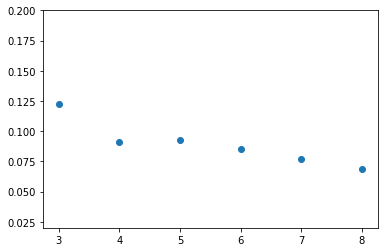

In [121]:
# Q1 Plot the average amount of chlorides for each quality value (1 from Part 3).
#plt.scatter(df.)
index = df.groupby('quality')['chlorides'].mean().index
data = df.groupby('quality')['chlorides'].mean()
plt.scatter(index, data)
plt.ylim(.02, .2)

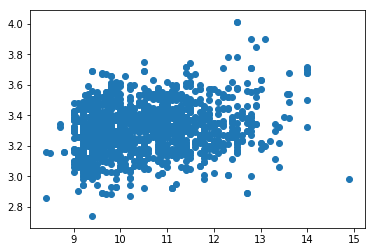

In [108]:
# Q2: Plot the alcohol values against pH values. Does there appear to be any relationship between the two?
plt.scatter(df['alcohol'], df['pH'])

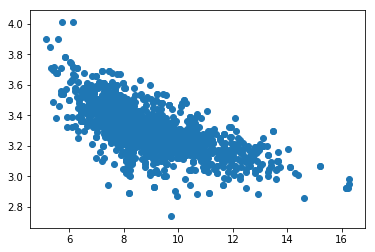

In [109]:
# Q3: Plot total_acidity values against pH values. Does there appear to be any relationship between the two?
plt.scatter(df['total_acidity'], df['pH'])

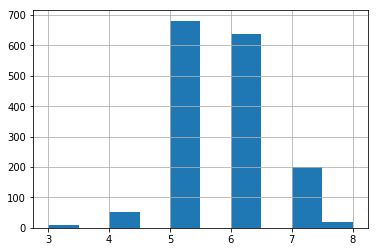

In [110]:
# Q4: Plot a histogram of the quality values. Are they evenly distributed within the data set?
df['quality'].hist()

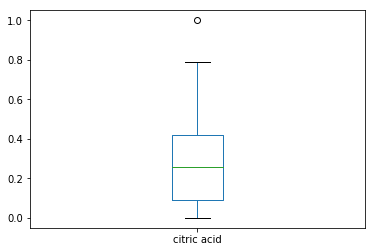

In [112]:
# Q5: Plot a boxplot to look at the distribution of citric acid
df['citric acid'].plot(kind='box')

### Part 5 - Putting it All Together 

Now that you've worked on all the basics with one data set, it's time to do it with a second! This time, though, you'll go through the process of downloading the data set yourself. You'll also go through the process of learning to ask questions of the data (i.e. you won't be given any questions). We'll point you to a number of different data sets, and let you go at it. In reality, this is often how data science works. There isn't a clear-cut set of instructions on what to do - you kind of just dive into the data and see what you find!

Your goal by the end of `Part 5` is to be able to tell a story with your data. Whether that means you query it and find something interesting, examine a number of different columns and their values, or plot a couple of different columns, it doesn't matter. You should aim to find at least one piece of interesting information in your data (and ideally even more than one). Then, tell your peers and the instructors what you've found! 

Potential data sources: 

1. [Forest-fires](http://archive.ics.uci.edu/ml/datasets/Forest+Fires)
2. [Iris](http://archive.ics.uci.edu/ml/datasets/Iris)
3. [Another wine data set](http://archive.ics.uci.edu/ml/datasets/Wine)
4. [Abalone](http://archive.ics.uci.edu/ml/datasets/Abalone)
5. [Adult Income data set](http://archive.ics.uci.edu/ml/datasets/Adult)

The links above are all to the home pages of these data sources. At the top of these pages, you will find a link the the `Data Folder` where you can actually find the data. The majority of these data sets don't come in `.csv` format. While one of the datasets is available in `.csv` format, we encourage you to pick whatever data set you find most interesting (regardless of the format), and challenge yourself to read the necessary documentation and go through the process of figuring out how to get the data from the web and into a `DataFrame` (the instructors will also be around to help).